In [1]:
import pandas as pd
import numpy as np
from sklearn import ensemble 
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, GridSearchCV, train_test_split

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# DATA CLEANING 

Data scientists spend a large amount of their time cleaning datasets and getting them down to a form with which they can work.
1. Dropping unnecessary columns in a DataFrame
2. Changing the index of a DataFrame
3. Using .str() methods to clean columns and rows if necessary
4. Converting obejcts/strings from a rows into binary number(numpy array) using 'onehotencoder'
4. Using the DataFrame.applymap() function to clean the entire dataset, element-wise
5. Renaming columns to a more recognizable set of labels
6. Skipping unnecessary rows OR saving necessary rows in a CSV file

In [2]:
#read data
#https://www.kaggle.com/wendykan/lending-club-loan-data/download
loan_data = pd.read_csv("Desktop/loan.csv")
#print(loan_data.shape)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(loan_data.dtypes) 

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [4]:
import tensorflow as tf

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passi

In [5]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,...,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,...,3.0,155.006696,3.0,13.686422,454.840802,11628.036442,193.606331,5030.606922,47.775600,13.148596
std,NaN,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832114e+00,2.671737e+02,1.126962e+05,NaN,1.418333e+01,...,0.0,129.113137,0.0,9.728138,375.830737,7615.161123,198.694368,3692.027842,7.336379,8.192319
min,NaN,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,NaN,-1.000000e+00,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,NaN,1.189000e+01,...,3.0,59.370000,3.0,5.000000,174.967500,5628.730000,43.780000,2227.000000,45.000000,6.000000
50%,NaN,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,NaN,1.784000e+01,...,3.0,119.040000,3.0,15.000000,352.605000,10044.220000,132.890000,4172.855000,45.000000,14.000000
75%,NaN,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,NaN,2.449000e+01,...,3.0,213.260000,3.0,22.000000,622.792500,16114.940000,284.180000,6870.782500,50.000000,18.000000
max,NaN,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,NaN,9.990000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [6]:
loan_data['home_ownership']

0              RENT
1          MORTGAGE
2          MORTGAGE
3          MORTGAGE
4          MORTGAGE
5          MORTGAGE
6              RENT
7              RENT
8          MORTGAGE
9               OWN
10         MORTGAGE
11         MORTGAGE
12         MORTGAGE
13         MORTGAGE
14         MORTGAGE
15         MORTGAGE
16         MORTGAGE
17         MORTGAGE
18         MORTGAGE
19         MORTGAGE
20         MORTGAGE
21         MORTGAGE
22             RENT
23         MORTGAGE
24             RENT
25         MORTGAGE
26         MORTGAGE
27             RENT
28              OWN
29         MORTGAGE
             ...   
2260638    MORTGAGE
2260639    MORTGAGE
2260640         OWN
2260641        RENT
2260642         OWN
2260643    MORTGAGE
2260644         OWN
2260645    MORTGAGE
2260646    MORTGAGE
2260647         OWN
2260648         OWN
2260649    MORTGAGE
2260650        RENT
2260651    MORTGAGE
2260652        RENT
2260653        RENT
2260654        RENT
2260655    MORTGAGE
2260656    MORTGAGE


In [7]:
loan_data.describe().transpose() #what happened to the other variables?
# do you see any outliers?

,count,mean,std,min,25%,50%,75%,max
id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,2260668.0,15046.931228,9190.245488,5.000000e+02,8000.0000,12900.000000,20000.000000,4.000000e+04
funded_amnt,2260668.0,15041.664057,9188.413022,5.000000e+02,8000.0000,12875.000000,20000.000000,4.000000e+04
funded_amnt_inv,2260668.0,15023.437624,9192.331807,0.000000e+00,8000.0000,12800.000000,20000.000000,4.000000e+04
int_rate,2260668.0,13.092913,4.832114,5.310000e+00,9.4900,12.620000,15.990000,3.099000e+01
installment,2260668.0,445.807646,267.173725,4.930000e+00,251.6500,377.990000,593.320000,1.719830e+03
annual_inc,2260664.0,77992.428687,112696.199574,0.000000e+00,46000.0000,65000.000000,93000.000000,1.100000e+08
url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dti,2258957.0,18.824196,14.183329,-1.000000e+00,11.8900,17.840000,24.490000,9.990000e+02


In [8]:
# Show number of missings in each of the above features. There are many ways. I do it this way:
# Deduct number of observations from count column in the describe table.
# To work with describe, let's check its type.
#type(loan_data.describe())

In [9]:
#loan_data.shape

In [10]:
# We are going to use sklearn to develop the model. 
# sklearn does not work with character variables; so we need to convert them to numeric. 

# temp_data = loan_data.drop([#"id",'member_id','url','sub_grade','emp_title','sec_app_open_acc','sec_app_revol_util',
#                            #'sec_app_open_act_il',  
#                             #"sec_app_num_rev_accts ", "sec_app_chargeoff_within_12_mths",
#                             #"sec_app_collections_12_mths_ex_med ", 
#                             #'sec_app_mths_since_last_major_derog','hardship_flag',
#                             #'hardship_type','hardship_reason','hardship_status',
#     'deferral_term','hardship_amount','hardship_start_date',
#                             #'hardship_end_date'
#     #'payment_plan_start_date','hardship_length','hardship_dpd','hardship_loan_status',
#                             #'orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_last_payment_amount',
#                             #'disbursement_method','debt_settlement_flag','debt_settlement_flag_date','settlement_status','settlement_date',
#                             #'settlement_amount','settlement_percentage','settlement_term',
#                            'revol_bal_joint',
#     'sec_app_earliest_cr_line'
#     ,'sec_app_inq_last_6mths','sec_app_mort_acc',
#                            'sec_app_num_rev_accts',"sec_app_chargeoff_within_12_mths",'sec_app_collections_12_mths_ex_med','mths_since_recent_bc_dlq',
#                            'desc','mths_since_last_delinq','mths_since_last_record','issue_d','title','zip_code',
#                            'addr_state','earliest_cr_line','initial_list_status','last_pymnt_d','next_pymnt_d','last_credit_pull_d',
#                            'application_type','verification_status_joint'],1)



In [11]:
temp_data = loan_data.drop(["id",'member_id','url','sub_grade','emp_title','sec_app_open_acc','sec_app_revol_util',
                           'sec_app_open_act_il',  
                            #"sec_app_num_rev_accts ", "sec_app_chargeoff_within_12_mths",
                            #"sec_app_collections_12_mths_ex_med ", 
                            'sec_app_mths_since_last_major_derog','hardship_flag',
                            'hardship_type','hardship_reason','hardship_status','deferral_term','hardship_amount','hardship_start_date',
                            'hardship_end_date','payment_plan_start_date','hardship_length','hardship_dpd','hardship_loan_status',
                            'orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_last_payment_amount',
                            'disbursement_method','debt_settlement_flag','debt_settlement_flag_date','settlement_status','settlement_date',
                            'settlement_amount','settlement_percentage','settlement_term',
                           'revol_bal_joint','sec_app_earliest_cr_line','sec_app_inq_last_6mths','sec_app_mort_acc',
                           'sec_app_num_rev_accts',"sec_app_chargeoff_within_12_mths",'sec_app_collections_12_mths_ex_med','mths_since_recent_bc_dlq',
                           'desc','mths_since_last_delinq','mths_since_last_record','issue_d','title','zip_code',
                           'addr_state','earliest_cr_line','initial_list_status','last_pymnt_d','next_pymnt_d','last_credit_pull_d',
                           'application_type','verification_status_joint'],1)



In [12]:
temp_data.shape

(2260668, 91)

In [13]:
temp_data['home_ownership']

0              RENT
1          MORTGAGE
2          MORTGAGE
3          MORTGAGE
4          MORTGAGE
5          MORTGAGE
6              RENT
7              RENT
8          MORTGAGE
9               OWN
10         MORTGAGE
11         MORTGAGE
12         MORTGAGE
13         MORTGAGE
14         MORTGAGE
15         MORTGAGE
16         MORTGAGE
17         MORTGAGE
18         MORTGAGE
19         MORTGAGE
20         MORTGAGE
21         MORTGAGE
22             RENT
23         MORTGAGE
24             RENT
25         MORTGAGE
26         MORTGAGE
27             RENT
28              OWN
29         MORTGAGE
             ...   
2260638    MORTGAGE
2260639    MORTGAGE
2260640         OWN
2260641        RENT
2260642         OWN
2260643    MORTGAGE
2260644         OWN
2260645    MORTGAGE
2260646    MORTGAGE
2260647         OWN
2260648         OWN
2260649    MORTGAGE
2260650        RENT
2260651    MORTGAGE
2260652        RENT
2260653        RENT
2260654        RENT
2260655    MORTGAGE
2260656    MORTGAGE


In [14]:
#temp_data.dtypes

In [15]:
temp_data[:].isnull().sum()

loan_amnt                               0
funded_amnt                             0
funded_amnt_inv                         0
term                                    0
int_rate                                0
installment                             0
grade                                   0
emp_length                         146907
home_ownership                          0
annual_inc                              4
verification_status                     0
loan_status                             0
pymnt_plan                              0
purpose                                 0
dti                                  1711
delinq_2yrs                            29
inq_last_6mths                         30
open_acc                               29
pub_rec                                29
revol_bal                               0
revol_util                           1802
total_acc                              29
out_prncp                               0
out_prncp_inv                     

In [16]:
#model_data = temp_data[~ temp_data["emp_length"].isnull()]

In [17]:
temp_data['emp_length'] = temp_data['emp_length'].replace({"1 year": 1,'10+ years' : 10, "2 years": 2,"3 years": 3,                                 
                                                       "4 years": 4,"5 years": 5,"6 years": 6,"7 years": 7,"8 years": 8,
                                                        "9 years": 9, "< 1 year": 1, 'NaN': 0 })




In [18]:
temp_data['emp_length']

0           10
1           10
2            6
3           10
4           10
5           10
6            4
7           10
8           10
9            1
10           1
11           2
12          10
13           4
14          10
15          10
16           4
17          10
18           4
19          10
20           1
21          10
22           9
23          10
24           1
25         NaN
26           2
27           5
28          10
29          10
          ... 
2260638     10
2260639     10
2260640     10
2260641      2
2260642      3
2260643     10
2260644      3
2260645      7
2260646      1
2260647    NaN
2260648    NaN
2260649      3
2260650      1
2260651      1
2260652    NaN
2260653    NaN
2260654      2
2260655     10
2260656     10
2260657    NaN
2260658      1
2260659    NaN
2260660      5
2260661    NaN
2260662      6
2260663     10
2260664      1
2260665     10
2260666    NaN
2260667      3
Name: emp_length, Length: 2260668, dtype: object

In [19]:
temp_data['term'].dtype

dtype('O')

In [20]:
temp_data['term'] = temp_data['term'].replace({' 36 months': 36, ' 60 months': 60})


In [21]:
set(temp_data['term'])

{36, 60}

In [22]:
temp_data['grade'] = temp_data['grade'].replace({"A": 100.00,'B' : 80.00, 'C': 70.00, 'D': 60.00, "E": 50.00, "F": 40.00, "G": 30.00})


In [23]:
temp_data['grade']

0           70.0
1           60.0
2           60.0
3           60.0
4           70.0
5           70.0
6           60.0
7           70.0
8           60.0
9           70.0
10          60.0
11          80.0
12         100.0
13          60.0
14          80.0
15          70.0
16          80.0
17          70.0
18          60.0
19          70.0
20          70.0
21          70.0
22          50.0
23          60.0
24          50.0
25          70.0
26          50.0
27          60.0
28          50.0
29          80.0
           ...  
2260638     60.0
2260639     60.0
2260640     70.0
2260641     40.0
2260642     60.0
2260643     80.0
2260644     40.0
2260645     70.0
2260646     60.0
2260647     70.0
2260648     40.0
2260649    100.0
2260650     40.0
2260651     60.0
2260652     40.0
2260653     80.0
2260654     60.0
2260655     40.0
2260656     40.0
2260657     70.0
2260658     70.0
2260659     80.0
2260660     70.0
2260661     30.0
2260662     40.0
2260663     70.0
2260664     50.0
2260665     80

In [24]:
temp_data['home_ownership'] = temp_data['home_ownership'].replace({'ANY': 1, 'MORTGAGE': 2, 'NONE': 0 , 'OTHER':3, 'OWN':4, 'RENT':5})

In [25]:
temp_data['home_ownership']

0          5
1          2
2          2
3          2
4          2
5          2
6          5
7          5
8          2
9          4
10         2
11         2
12         2
13         2
14         2
15         2
16         2
17         2
18         2
19         2
20         2
21         2
22         5
23         2
24         5
25         2
26         2
27         5
28         4
29         2
          ..
2260638    2
2260639    2
2260640    4
2260641    5
2260642    4
2260643    2
2260644    4
2260645    2
2260646    2
2260647    4
2260648    4
2260649    2
2260650    5
2260651    2
2260652    5
2260653    5
2260654    5
2260655    2
2260656    2
2260657    2
2260658    5
2260659    4
2260660    5
2260661    2
2260662    2
2260663    2
2260664    2
2260665    4
2260666    5
2260667    5
Name: home_ownership, Length: 2260668, dtype: int64

In [26]:
set(temp_data['home_ownership'])

{0, 1, 2, 3, 4, 5}

In [27]:
temp_data['verification_status'] = temp_data['verification_status'].replace({'Not Verified':0, 'Source Verified':50, 'Verified':100})



In [28]:
set(temp_data['verification_status'])

{0, 50, 100}

In [29]:
temp_data['loan_status'] = temp_data['loan_status'].replace({'Charged Off':1,'Current':1,'Default':0,'Does not meet the credit policy. Status:Charged Off':0,
 'Does not meet the credit policy. Status:Fully Paid':0,'Fully Paid':1,'In Grace Period':1,'Late (16-30 days)':1,'Late (31-120 days)':0})



In [30]:
set(temp_data['loan_status'])

{0, 1}

In [31]:
temp_data['pymnt_plan'] = temp_data['pymnt_plan'].replace({'n':0, 'y':1})



In [32]:
set(temp_data['pymnt_plan'])

{0, 1}

In [33]:
# temp_data['purpose'] = temp_data['purpose'].replace({'car':1,
#  'credit_card':2,
#  'debt_consolidation':3,
#  'educational':4,
#  'home_improvement':5,
#  'house':6,
#  'major_purchase':7,
#  'medical':8,
#  'moving':9,
#  'other':0,
#  'renewable_energy':10,
#  'small_business':11,
#  'vacation':12,
#  'wedding':13})

In [34]:
set(temp_data['purpose'])

{'car',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'house',
 'major_purchase',
 'medical',
 'moving',
 'other',
 'renewable_energy',
 'small_business',
 'vacation',
 'wedding'}

In [35]:
list = []
for i in temp_data:
    if temp_data[i].dtypes == object:
        print(temp_data[i])
        #we don't get any objects means removed all the objects and converted some 
        #into float by adding values in the features

0           10
1           10
2            6
3           10
4           10
5           10
6            4
7           10
8           10
9            1
10           1
11           2
12          10
13           4
14          10
15          10
16           4
17          10
18           4
19          10
20           1
21          10
22           9
23          10
24           1
25         NaN
26           2
27           5
28          10
29          10
          ... 
2260638     10
2260639     10
2260640     10
2260641      2
2260642      3
2260643     10
2260644      3
2260645      7
2260646      1
2260647    NaN
2260648    NaN
2260649      3
2260650      1
2260651      1
2260652    NaN
2260653    NaN
2260654      2
2260655     10
2260656     10
2260657    NaN
2260658      1
2260659    NaN
2260660      5
2260661    NaN
2260662      6
2260663     10
2260664      1
2260665     10
2260666    NaN
2260667      3
Name: emp_length, Length: 2260668, dtype: object
0          debt_consolidation
1     

In [36]:
temp_data.dtypes

loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                                int64
int_rate                          float64
installment                       float64
grade                             float64
emp_length                         object
home_ownership                      int64
annual_inc                        float64
verification_status                 int64
loan_status                         int64
pymnt_plan                          int64
purpose                            object
dti                               float64
delinq_2yrs                       float64
inq_last_6mths                    float64
open_acc                          float64
pub_rec                           float64
revol_bal                           int64
revol_util                        float64
total_acc                         float64
out_prncp                         float64
out_prncp_inv                     

In [37]:
#model_data = temp_data[~ temp_data["mort_acc"].isnull()]

In [38]:
#model_data.drop(["mort_acc"],1,inplace=True)

In [39]:
model_data = temp_data["mort_acc"].isnull().dropna().copy()

In [40]:
print(temp_data["mort_acc"].isnull().sum())
print(model_data.shape)

50030
(2260668,)


In [41]:
# model_data = temp_data[~ temp_data["emp_length"].isnull()]
# model_data = temp_data[~ temp_data["dti"].isnull()]
# model_data = temp_data[~ temp_data["delinq_2yrs"].isnull()]
# model_data = temp_data[~ temp_data["inq_last_6mths"].isnull()]
# model_data = temp_data[~ temp_data["open_acc"].isnull()]
# model_data = temp_data[~ temp_data["pub_rec"].isnull()]
# model_data = temp_data[~ temp_data["revol_util"].isnull()]
# model_data = temp_data[~ temp_data["total_acc"].isnull()]
# model_data = temp_data[~ temp_data["mo_sin_old_il_acct"].isnull()]
model_data = temp_data[~ temp_data["mths_since_recent_revol_delinq"].isnull()]

In [42]:
temp_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint',
       'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_

In [43]:
model_data.shape

(740359, 91)

In [44]:
model_data['avg_cur_bal'].mean()

14203.373189706763

In [45]:
model_data['emp_length'].fillna(1, inplace = True)
model_data['dti'].fillna(10, inplace = True)
model_data['revol_util'].fillna(60, inplace = True)
model_data['mo_sin_old_il_acct'].fillna(88, inplace = True)
model_data['mo_sin_old_rev_tl_op'].fillna(260, inplace = True)
model_data['mo_sin_rcnt_rev_tl_op'].fillna(10, inplace = True)
model_data['mo_sin_rcnt_tl'].fillna(6, inplace = True)
model_data['mths_since_recent_bc'].fillna(15, inplace = True)
model_data['mths_since_recent_inq'].fillna(7, inplace = True)
model_data['num_accts_ever_120_pd'].fillna(0, inplace = True)
model_data['num_actv_bc_tl'].fillna(6, inplace = True)
model_data['num_actv_rev_tl'].fillna(4, inplace = True)

model_data['num_bc_sats'].fillna(4, inplace = True)
model_data['num_bc_tl'].fillna(7, inplace = True)
model_data['num_il_tl'].fillna(11, inplace = True)
model_data['num_op_rev_tl'].fillna(7, inplace = True)
model_data['num_rev_accts'].fillna(11, inplace = True)
model_data['num_rev_tl_bal_gt_0'].fillna(10, inplace = True)
model_data['num_sats'].fillna(4, inplace = True)
model_data['num_tl_120dpd_2m'].fillna(0, inplace = True)
model_data['num_tl_30dpd'].fillna(0, inplace = True)

model_data['num_tl_90g_dpd_24m'].fillna(0, inplace = True)
model_data['num_tl_op_past_12m'].fillna(3, inplace = True)
model_data['pct_tl_nvr_dlq'].fillna(66, inplace = True)
model_data['percent_bc_gt_75'].fillna(0, inplace = True)
model_data['tot_hi_cred_lim'].fillna(186287.010, inplace = True)
model_data['total_il_high_credit_limit'].fillna(45241, inplace = True)
model_data['policy_code'].fillna(1, inplace = True)
model_data['dti_joint'].fillna(0, inplace = True)

model_data['acc_now_delinq'].fillna(0, inplace = True)
model_data['tot_cur_bal'].fillna(150452, inplace = True)
model_data['open_acc_6m'].fillna(1, inplace = True)
model_data['open_act_il'].fillna(2, inplace = True)
model_data['open_il_12m'].fillna(1, inplace = True)
model_data['open_il_24m'].fillna(1, inplace = True)
model_data['mths_since_rcnt_il'].fillna(21, inplace = True)

model_data['total_bal_il'].fillna(36937, inplace = True)
model_data['il_util'].fillna(69, inplace = True)
model_data['open_rv_12m'].fillna(1, inplace = True)
model_data['open_rv_24m'].fillna(2, inplace = True)
model_data['max_bal_bc'].fillna(5250, inplace = True)
model_data['all_util'].fillna(57, inplace = True)
model_data['total_rev_hi_lim'].fillna(31189, inplace = True)
model_data['inq_fi'].fillna(1, inplace = True)
model_data['total_cu_tl'].fillna(1, inplace = True)

model_data['inq_last_12m'].fillna(2, inplace = True)
model_data['acc_open_past_24mths'].fillna(4.66, inplace = True)
model_data['bc_open_to_buy'].fillna(9488, inplace = True)
model_data['bc_util'].fillna(58, inplace = True)
model_data['chargeoff_within_12_mths'].fillna(0, inplace = True)

model_data['mths_since_last_major_derog'].fillna(23, inplace = True)
model_data['annual_inc_joint'].fillna(6013, inplace = True)
model_data['tot_coll_amt'].fillna(6013, inplace = True)
model_data['avg_cur_bal'].fillna(14203, inplace = True)

#-------------------------------------------------------------------------------------------------


# model_data['id'].fillna(0.1, inplace = True)
# model_data['member_id'].fillna(0.1, inplace = True)
# model_data['url'].fillna(0.1, inplace = True)
# model_data['sub_grade'].fillna(0.1, inplace = True)


# model_data['emp_title'].fillna(0.1, inplace = True)
# model_data['sec_app_open_acc'].fillna(0.1, inplace = True)
# model_data['sec_app_revol_util'].fillna(0.1, inplace = True)
# model_data['sec_app_open_act_il'].fillna(0.1, inplace = True)


#model_data["sec_app_earliest_cr_line "].fillna(11, inplace = True)
#model_data['sec_app_chargeoff_within_12_mths'].fillna(0, inplace = True)
#model_data['sec_app_collections_12_mths_ex_med'].fillna(0.1, inplace = True)
#model_data['sec_app_mths_since_last_major_derog'].fillna(0.1, inplace = True)


#model_data['hardship_flag'].fillna(0.1, inplace = True)
#model_data['hardship_type'].fillna(0.1, inplace = True)
#model_data['hardship_reason'].fillna(0.1, inplace = True)
#model_data['hardship_status'].fillna(0.1, inplace = True)

#model_data['deferral_term'].fillna(0.1, inplace = True)
#model_data['hardship_amount'].fillna(0.1, inplace = True)
#model_data['hardship_start_date'].fillna(0.1, inplace = True)

# model_data['hardship_end_date'].fillna(0.1, inplace = True)


# model_data['payment_plan_start_date'].fillna(0.1, inplace = True)
# model_data['hardship_length'].fillna(0.1, inplace = True)
# model_data['hardship_dpd'].fillna(0.1, inplace = True)
# model_data['hardship_loan_status'].fillna(0.1, inplace = True)


# model_data['orig_projected_additional_accrued_interest'].fillna(0.1, inplace = True)
# model_data['hardship_payoff_balance_amount'].fillna(0.1, inplace = True)
# model_data['hardship_last_payment_amount'].fillna(0.1, inplace = True)
# model_data['disbursement_method'].fillna(0.1, inplace = True)


# model_data['debt_settlement_flag'].fillna(0.1, inplace = True)
# model_data['debt_settlement_flag_date'].fillna(0.1, inplace = True)
# model_data['settlement_status'].fillna(0.1, inplace = True)
# model_data['settlement_date'].fillna(0.1, inplace = True)


# model_data['settlement_amount'].fillna(0.1, inplace = True)
# model_data['settlement_percentage'].fillna(0.1, inplace = True)
# model_data['settlement_term'].fillna(0.1, inplace = True)



/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [46]:
#"id",'member_id','url','sub_grade','emp_title','sec_app_open_acc','sec_app_revol_util',
                           #'sec_app_open_act_il',  
                            #"sec_app_num_rev_accts ", "sec_app_chargeoff_within_12_mths",
                            #"sec_app_collections_12_mths_ex_med ", 
                            #'sec_app_mths_since_last_major_derog','hardship_flag',
                            #'hardship_type','hardship_reason','hardship_status','deferral_term','hardship_amount','hardship_start_date',
                            #'hardship_end_date','payment_plan_start_date','hardship_length','hardship_dpd','hardship_loan_status',
                            #'orig_projected_additional_accrued_interest','hardship_payoff_balance_amount','hardship_last_payment_amount',
                            #'disbursement_method','debt_settlement_flag','debt_settlement_flag_date','settlement_status','settlement_date',
                            #'settlement_amount','settlement_percentage','settlement_term',
                       

In [47]:
model_data['avg_cur_bal'].isnull().sum()

0

In [48]:
model_data.shape

(740359, 91)

In [49]:
model_data['chargeoff_within_12_mths'].isnull().sum()

0

In [50]:
# Sklearn does not work with missing values; 
# so we need to impute missing values.
# first calculate number of missing

(model_data.shape[0] - model_data.describe().transpose()["count"]).values
    

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [51]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import Normalizer
# import sys

# le = LabelEncoder()
# list = []
# for i in model_data:
    
#     if model_data[i].dtypes == object:
#         model_data[i] = le.fit_transform(model_data[i])
#     elif model_data[i].dtypes == bool:
#         model_data[i] = le.fit_transform(model_data[i])
#         print(model_data[i])


# model_data = le.fit_transform(model_data['loan_status'])
# model_data = le.fit_transform(model_data['purpose'])


#model_data.iloc[:,8].shape

In [52]:
# X_data = model_data.drop(['home_ownership'],1)
# X_data.shape

# set(model_data.dtypes)

In [53]:
categorical_vars = model_data.columns[model_data.dtypes == object].values
categorical_vars

array(['purpose'], dtype=object)

In [54]:
obj_df = model_data.select_dtypes(include=['object']).copy()
obj_df.head()

,purpose
8,debt_consolidation
9,debt_consolidation
10,credit_card
15,debt_consolidation
18,credit_card


In [55]:
obj_df = pd.get_dummies(obj_df,drop_first=True)
obj_df.shape

(740359, 13)

In [56]:
model_data.drop(categorical_vars,axis=1,inplace=True) #drop transformed original features

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [57]:
#Finally!!
model_data= pd.concat([model_data, obj_df],axis=1)
model_data.shape

(740359, 103)

In [58]:
save_model_data = model_data.to_csv ('Desktop/modeldata.csv', index = None, header=True)

In [59]:
#Final check if all dtypes are numeric and NO NULL data found!
print("Number of nonNAN values in the refined dataset is: " ,model_data.isnull().any().sum())
print(model_data.dtypes.value_counts())

Number of nonNAN values in the refined dataset is:  0
float64    80
uint8      13
int64      10
dtype: int64


In [60]:
model_data = model_data.astype('float32')
print(model_data.dtypes.value_counts())

float32    103
dtype: int64


# Train/Test Split¶

In [61]:
target = 'loan_status'
X = model_data.drop(target, axis = 1)
Y = model_data[target]

Our target variable classes are unbalanced from the count in the cell below. 
Since we are implementing a tree based algorithm, our model will perform well on this imbalanced dataset due to the hierarchical structure of the algorithm which allows the model to learn signals from both classes: "0" and "1".  

In [62]:
Y.value_counts()

1.0    732425
0.0      7934
Name: loan_status, dtype: int64

# SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is an over-sampling method. What it does is, it creates synthetic (not duplicate) samples of the minority class. Hence making the minority class equal to the majority class. SMOTE does this by selecting similar records and altering that record one column at a time by a random amount within the difference to the neighbouring records.
We will be diving into python to see how this works. If you want to read more on SMOTE, here is an original research paper titled: “SMOTE: Synthetic Minority Over-sampling Technique” written in 2002.


In [63]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 2) 


Using TensorFlow backend.


In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state= 0)
X_train, y_train = sm.fit_sample(X, Y.ravel())

In [66]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 

After OverSampling, counts of label '1': 732425
After OverSampling, counts of label '0': 732425


In [67]:
X_train.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
pymnt_plan                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
                             ..
num_il_t

In [69]:
params = {'n_estimators': 27,'max_leaf_nodes':6,'learning_rate': 0.1, 'random_state':1}
model = ensemble.GradientBoostingClassifier(**params)
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=6,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=27,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [70]:
# calculate AUC
roc_auc_score(y_test, model.predict(X_test))

0.7190212963103977

In [71]:
# A better model
params = {'n_estimators': 100,'max_leaf_nodes':6,'learning_rate': 0.1, 'random_state':1}
model = ensemble.GradientBoostingClassifier(**params)
model.fit(X_train, y_train)

roc_auc_score(y_test, model.predict(X_test))

0.6062585430422179

# Feature Importance for GridSearch

In [72]:
feature_importance = pd.DataFrame()
feature_importance['Variable'] = X_train.columns
feature_importance['Importance'] = model.feature_importances_

# feature_importance values in descending order
feature_importance.sort_values(by='Importance', ascending=False).head(10)

,Variable,Importance
20,out_prncp,0.405249
26,total_rec_late_fee,0.149678
21,out_prncp_inv,0.076612
6,grade,0.068204
10,verification_status,0.057861
90,purpose_debt_consolidation,0.040794
67,num_accts_ever_120_pd,0.022860
45,open_rv_12m,0.020778
14,inq_last_6mths,0.020696
13,delinq_2yrs,0.018407


In [73]:
#Search Grid on only these features to save time
features = feature_importance['Variable'][feature_importance.Importance >0].values
features

array(['term', 'grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'delinq_2yrs',
       'inq_last_6mths', 'pub_rec', 'out_prncp', 'out_prncp_inv',
       'total_rec_late_fee', 'mths_since_last_major_derog',
       'tot_coll_amt', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_bc_sats', 'num_tl_90g_dpd_24m',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_other'], dtype=object)

In [74]:
X_grid = model_data[features]
Y_grid = model_data[target]
X_train_grid,X_test_grid,y_train_grid,y_test_grid=train_test_split(X_grid,Y_grid,test_size=0.3,random_state= 0)
# now we run a grid search on GBM parameters
# save the results to choose the best parameters
results = pd.DataFrame(columns=["# Trees", "Max Features", "Learning Rate",
                                "Max Leaf Nodes", "Min Split","AUC-Train","AUC-Test", "Loss-Train",'Loss-Test'])
n = 0    
for n_estimators in [50, 200]:
        for max_features in ['auto']:
                for learning_rate in [0.001, 0.01, 0.5]:
                    for max_leaf_nodes in [4, 12, 20]:
                            for min_samples_split in [0.0001, 0.1, 0.2]:
                                n += 1
                                print("Loop number ", str(n))
                                params = {'n_estimators': n_estimators,  
                                  'max_features':max_features,'max_leaf_nodes':max_leaf_nodes, 
                                  'learning_rate': learning_rate, 
                                  'min_samples_split': min_samples_split,
                                  'subsample':0.8, 'random_state':1}
                                model = ensemble.GradientBoostingClassifier(**params)
                                model.fit(X_train_grid, y_train_grid)
                                results.loc[len(results)]=[n_estimators, max_features, learning_rate,
                                               max_leaf_nodes, min_samples_split,
                                               roc_auc_score(y_train_grid, model.predict(X_train_grid)),
                                               roc_auc_score(y_test_grid, model.predict(X_test_grid)),
                                               model.loss_(y_train_grid,model.predict(X_train_grid)),
                                               model.loss_(y_test_grid,model.predict(X_test_grid))]

Loop number  1
Loop number  2
Loop number  3
Loop number  4
Loop number  5
Loop number  6
Loop number  7
Loop number  8
Loop number  9
Loop number  10
Loop number  11
Loop number  12
Loop number  13
Loop number  14
Loop number  15
Loop number  16
Loop number  17
Loop number  18
Loop number  19
Loop number  20
Loop number  21
Loop number  22
Loop number  23
Loop number  24
Loop number  25
Loop number  26
Loop number  27
Loop number  28
Loop number  29
Loop number  30
Loop number  31
Loop number  32
Loop number  33
Loop number  34
Loop number  35
Loop number  36
Loop number  37
Loop number  38
Loop number  39
Loop number  40
Loop number  41
Loop number  42
Loop number  43
Loop number  44
Loop number  45
Loop number  46
Loop number  47
Loop number  48
Loop number  49
Loop number  50
Loop number  51
Loop number  52
Loop number  53
Loop number  54


In [75]:
results.sort_values(by=['AUC-Train','AUC-Test',"AUC-Train","AUC-Test", "Loss-Train",'Loss-Test'])

,# Trees,Max Features,Learning Rate,Max Leaf Nodes,Min Split,AUC-Train,AUC-Test,Loss-Train,Loss-Test
0,50,auto,0.001,4,0.0001,0.500000,0.500000,0.646790,0.646434
1,50,auto,0.001,4,0.1000,0.500000,0.500000,0.646790,0.646434
2,50,auto,0.001,4,0.2000,0.500000,0.500000,0.646790,0.646434
3,50,auto,0.001,12,0.0001,0.500000,0.500000,0.646790,0.646434
4,50,auto,0.001,12,0.1000,0.500000,0.500000,0.646790,0.646434
5,50,auto,0.001,12,0.2000,0.500000,0.500000,0.646790,0.646434
6,50,auto,0.001,20,0.0001,0.500000,0.500000,0.646790,0.646434
7,50,auto,0.001,20,0.1000,0.500000,0.500000,0.646790,0.646434
8,50,auto,0.001,20,0.2000,0.500000,0.500000,0.646790,0.646434
9,50,auto,0.010,4,0.0001,0.500000,0.500000,0.646790,0.646434


In [76]:
export_csv = results.to_csv ('Desktop/GBM_pd.csv', index = None, header=True)

In [77]:
read_results = pd.read_csv('Desktop/GBM_pd.csv')
read_results.head() 

,# Trees,Max Features,Learning Rate,Max Leaf Nodes,Min Split,AUC-Train,AUC-Test,Loss-Train,Loss-Test
0,50,auto,0.001,4,0.0001,0.5,0.5,0.64679,0.646434
1,50,auto,0.001,4,0.1000,0.5,0.5,0.64679,0.646434
2,50,auto,0.001,4,0.2000,0.5,0.5,0.64679,0.646434
3,50,auto,0.001,12,0.0001,0.5,0.5,0.64679,0.646434
4,50,auto,0.001,12,0.1000,0.5,0.5,0.64679,0.646434


In [78]:
# loss_test = results['AUC-Test']
read_results.sort_values(by=['Loss-Test'])

,# Trees,Max Features,Learning Rate,Max Leaf Nodes,Min Split,AUC-Train,AUC-Test,Loss-Train,Loss-Test
36,200,auto,0.010,4,0.0001,0.516155,0.514567,0.646366,0.646055
41,200,auto,0.010,12,0.2000,0.516155,0.514567,0.646366,0.646055
40,200,auto,0.010,12,0.1000,0.516155,0.514567,0.646366,0.646055
44,200,auto,0.010,20,0.2000,0.516155,0.514567,0.646366,0.646055
38,200,auto,0.010,4,0.2000,0.516155,0.514567,0.646366,0.646055
37,200,auto,0.010,4,0.1000,0.516155,0.514567,0.646366,0.646055
43,200,auto,0.010,20,0.1000,0.516155,0.514567,0.646366,0.646055
42,200,auto,0.010,20,0.0001,0.516157,0.514353,0.646363,0.646060
39,200,auto,0.010,12,0.0001,0.516157,0.514353,0.646363,0.646060
27,200,auto,0.001,4,0.0001,0.500000,0.500000,0.646790,0.646434


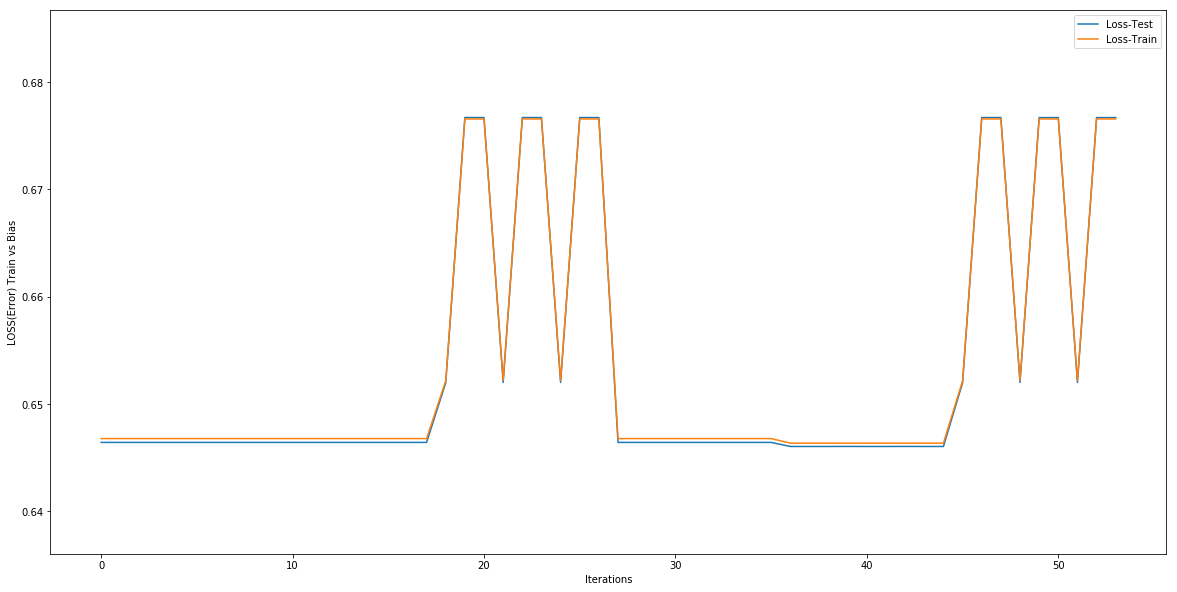

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plt.ylim(read_results['Loss-Test'].min()-0.01, read_results['Loss-Test'].max()+0.01)
plt.plot(range(len(read_results['Loss-Test'])),
        read_results['Loss-Test']);

plt.plot(range(len(read_results['Loss-Train'])),
        read_results['Loss-Train']);
plt.legend()
plt.xlabel('Iterations');
plt.ylabel('LOSS(Error) Train vs Bias');

In [80]:
#choosing best parameters from gridsearch
params = {'n_estimators': 200,'max_features':'auto','max_leaf_nodes':20,
          'learning_rate': 0.5,'min_samples_split': 0.0001,'subsample':0.8, 'random_state':1}
best_model = ensemble.GradientBoostingClassifier(**params)
best_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=20,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=0.0001,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [81]:
roc_auc_score(y_test, best_model.predict(X_test))
best_model.score(X_test,y_test)

0.9900949087831146

# Final Feature Importance

In [82]:
feature_importance_2 = pd.DataFrame()
feature_importance_2['Variable'] = X_train.columns
feature_importance_2['Importance'] = best_model.feature_importances_

# feature_importance values in descending order
feature_importance_2.sort_values(by='Importance', ascending=False).head(10)



,Variable,Importance
20,out_prncp,0.497711
26,total_rec_late_fee,0.155280
10,verification_status,0.067977
6,grade,0.050803
14,inq_last_6mths,0.048690
45,open_rv_12m,0.040967
90,purpose_debt_consolidation,0.031772
7,emp_length,0.018584
67,num_accts_ever_120_pd,0.018377
13,delinq_2yrs,0.015862


In [83]:
#Save my important ranked feature, by the GBM, in CSV. You never know what could happen!
# I can save all DFs in a single excel by specifying different sheet names, but I want them in Separate csv files
export_csv_2 = feature_importance_2.to_csv ('Desktop/GBM_Feature_importance.csv', index = None, header=True)

In [84]:
proba_classes = pd.DataFrame()
proba_classes['Y']= y_test
proba_classes['Class:0'] = best_model.predict_proba(X_test)[:, 0]
proba_classes['Class:1'] = best_model.predict_proba(X_test)[:, 1]
proba_classes

,Y,Class:0,Class:1
680825,1.0,0.000170,0.999830
1455562,1.0,0.016103,0.983897
1187127,1.0,0.000470,0.999530
2167010,1.0,0.025608,0.974392
1198025,1.0,0.000062,0.999938
1086812,0.0,0.180008,0.819992
961611,1.0,0.000802,0.999198
2034234,1.0,0.000326,0.999674
1089932,1.0,0.000366,0.999634
1291994,1.0,0.000128,0.999872


# Histogram of Class Probabilities

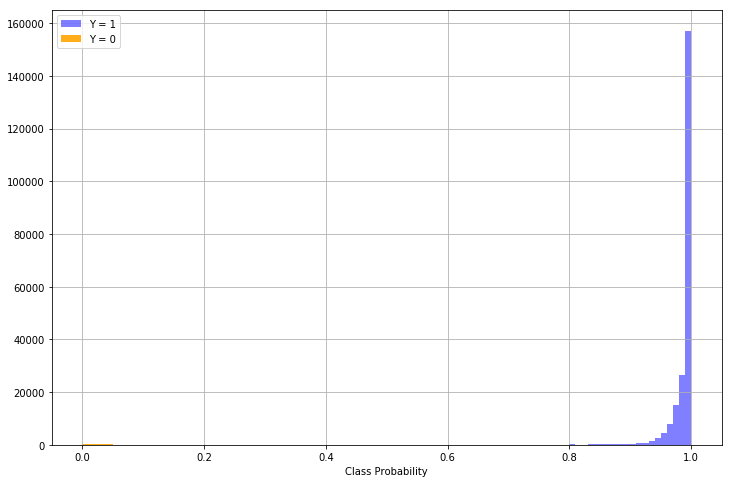

In [85]:
plt.figure(figsize=(12,8))
proba_classes[proba_classes.Y==1]['Class:1'].hist(alpha=0.5,color='blue',
                                              bins=100,label='Y = 1')
proba_classes[proba_classes.Y==0]['Class:0'].hist(alpha=0.9,color='orange',
                                              bins=100,label='Y = 0')
plt.legend()
plt.xlabel('Class Probability');

In [86]:
n_estimators = params['n_estimators']
def heldout_score(model, X_test, y_test):
    """compute deviance scores on ``X_test`` and ``y_test``. """
    score = np.zeros((n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(model.staged_decision_function(X_test)):
        score[i] = model.loss_(y_test, y_pred)   
    return score

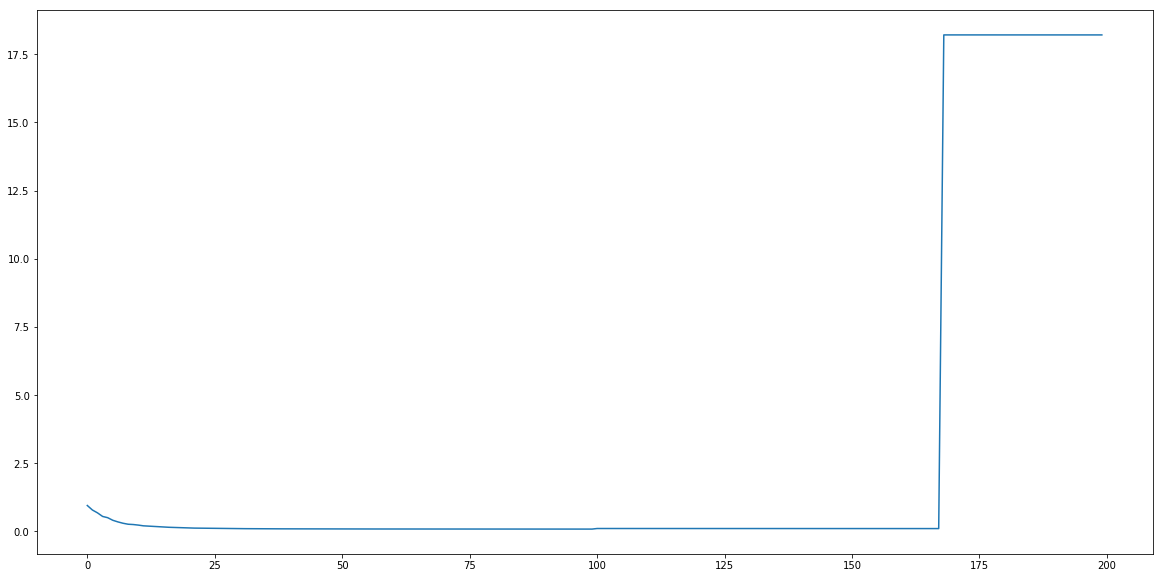

In [87]:
plt.figure(figsize=(20,10))

test_score = heldout_score(best_model, X_test, y_test)
plt.plot(range(len(test_score)), test_score);

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,best_model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.80      0.08      0.14      2334
         1.0       0.99      1.00      1.00    219774

    accuracy                           0.99    222108
   macro avg       0.90      0.54      0.57    222108
weighted avg       0.99      0.99      0.99    222108



# Segmentation & Pricing for the credit loan data

1.Logistic 

2.Neural Network

3.Gradient Boosting 



Use each model to do segmentation; i.e. sort customers based on the probability of default estimated by each model, then classify them into 10 equal groups. Calculate bad rate for each group. Do your models Rank Order? Choose model with the best rank ordering for the next parts.

Assume risk free rate is 2%. Also assume that bad rate calculated in part 1, gives 1-year probability of default for each customer. Calculate the proper interest rate for each segment such that expected 1-year payoff for each segment equals 1-year risk-free pay off.

For the sake of simplicity assume that installments are paid annually; so for example a loan with 36 months term, will have 3 payments. Write a function that gets loan amount, number of payments, and interest rate as inputs, and calculates payments (look at this link for example: https://financeformulas.net/Loan_Payment_Formula.html). Use this function to calculate annual payment for each loan where interest rate comes from part 2. For the loan amount use "loan_amount" field and for the term use "term" field.

Write a function that gets loan amount, probability of default, loan term, loan installment, and discount rate as inputs, and calculates the expected NPV of loan. Use this function to calculate expected NPV for each loan. For Probability of Default, use outputs of your scoring model. For loan installment use results of part 3. For discount rate use risk free rate.

Hint: Note that cash flows are stochastic. For example if probability of default for a customer is 10%, with 10% probability he/she will default at the end of the first year, hence zero payoff. With 90% bank will collect the first year installment, and will continue to second year. In the second year, again with 10% probability customer will default, and with 90% no default. Therefore probability that bank collects second year installment is 0.9*0.9 = 0.81. Continue until loan maturity.

Calculate total expected NPV for each segment. Plot total Expected NPV versus Bad Rate. What is your expectation about the shape of the curve?

In [89]:
import pickle 

In [90]:
def save_model(model_name, model):
    '''
    model_name = name.pkl
    joblib.load('name.pkl')
    assign a variable to load model
    '''
    with open(str(model_name), 'wb') as f:
        pickle.dump(model, f)

In [91]:
#save fitted models
save_model('GBM.pkl', best_model)

In [92]:

GBM_model = pd.read_pickle("GBM.pkl")
GBM_model 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=20,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=0.0001,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [93]:
GBM_model.predict_proba(X_test)

array([[1.69948912e-04, 9.99830051e-01],
       [1.61031454e-02, 9.83896855e-01],
       [4.69999875e-04, 9.99530000e-01],
       ...,
       [1.30419834e-04, 9.99869580e-01],
       [1.73935363e-04, 9.99826065e-01],
       [8.19747398e-05, 9.99918025e-01]])

In [103]:
def score_new(X,Y,model,clas):
    score = pd.DataFrame(1- model.predict_proba(X)[:,clas], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    score['Y'] = Y
    new_score = score.groupby('DECILE')['Y'].apply(lambda y : len([elem for elem in y if elem == 0 ])/len(y))
    # 0:Default
    return(new_score, score)

In [112]:
GBM_scoring,_ = score_new(X_train,y_train,GBM_model,1)
GBM_scoring

DECILE
1.0     0.999966
2.0     0.999993
3.0     1.000000
4.0     1.000000
5.0     0.960644
6.0     0.029826
7.0     0.009312
8.0     0.000143
9.0     0.000048
10.0    0.000068
Name: Y, dtype: float64

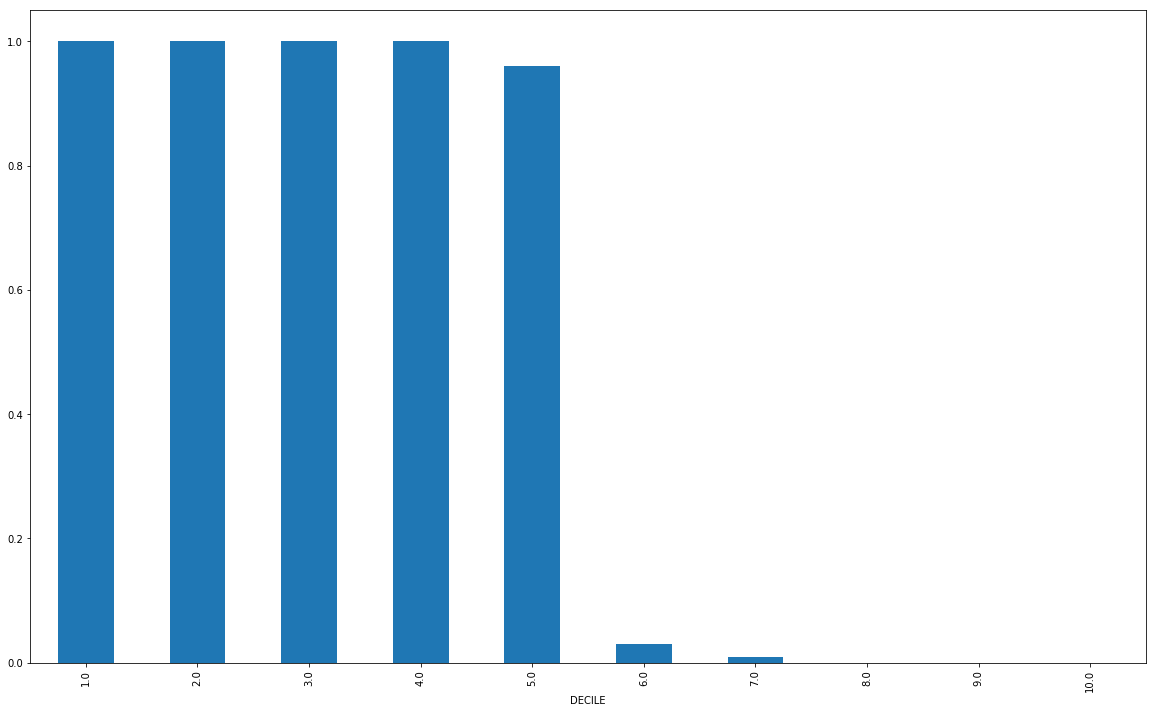

In [113]:
GBM_scoring.plot(kind='bar',figsize = (20,12));

# Pricing

In [124]:
bucket_int = GBM_scoring.apply(lambda x: ((1.02)/(1.01 - x))- 1)
bucket_int

DECILE
1.0     100.653026
2.0     100.930416
3.0     101.000000
4.0     101.000000
5.0      19.666362
6.0       0.040631
7.0       0.019298
8.0       0.010044
9.0       0.009949
10.0      0.009969
Name: Y, dtype: float64

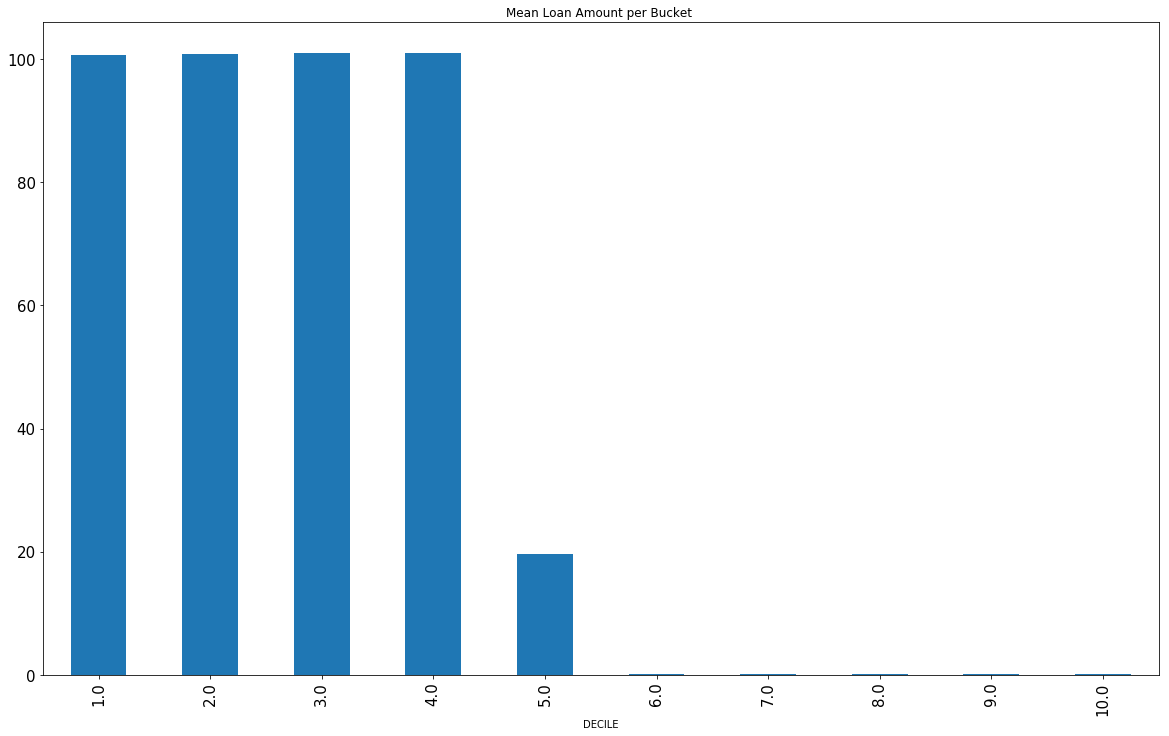

In [125]:
bucket_int.plot(kind='bar',figsize = (20,12), title = 'Mean Loan Amount per Bucket ', fontsize= 15);

In [126]:
interest = dict(bucket_int)
interest

{1.0: 100.65302581896098,
 2.0: 100.93041579970632,
 3.0: 100.99999999999991,
 4.0: 100.99999999999991,
 5.0: 19.66636237266335,
 6.0: 0.04063111480395887,
 7.0: 0.019298247409282654,
 8.0: 0.010044355783202619,
 9.0: 0.009948774138121452,
 10.0: 0.009969254396296812}

In [134]:
GBM_scoring, scored_data = score_new(X_train, y_train, GBM_model,1)

In [150]:
scored_data['Interest'] = scored_data['DECILE'].map(interest)
scored_data['loan_amnt'] = X_train['loan_amnt']
scored_data['term_payments'] = X_train['term'].apply(lambda x: 5 if x == 1 else 3)

In [151]:
scored_data.tail(10)

,SCORE,DECILE,Y,Interest,loan_amnt,term_payments,Payments
1464840,0.999998,1.0,0.0,100.653026,9429.037109,3,NaN
1464841,0.999887,4.0,0.0,101.000000,1703.787231,3,1.212001e+06
1464842,0.999922,4.0,0.0,101.000000,19571.138672,3,NaN
1464843,0.999999,1.0,0.0,100.653026,12335.589844,3,NaN
1464844,1.000000,1.0,0.0,100.653026,13771.021484,3,1.006531e+06
1464845,0.999999,1.0,0.0,100.653026,32229.078125,3,1.006531e+05
1464846,0.999732,4.0,0.0,101.000000,10000.000000,3,NaN
1464847,0.998841,5.0,0.0,19.666362,8665.969727,3,NaN
1464848,0.999809,4.0,0.0,101.000000,21028.523438,3,NaN
1464849,0.999988,2.0,0.0,100.930416,19005.544922,3,1.211166e+06


DECILE
1.0     16578.056641
2.0     16309.146484
3.0     16354.538086
4.0     16187.485352
5.0     16231.441406
6.0     15881.320312
7.0     15095.591797
8.0     11976.817383
9.0     14228.442383
10.0    16692.484375
Name: loan_amnt, dtype: float32


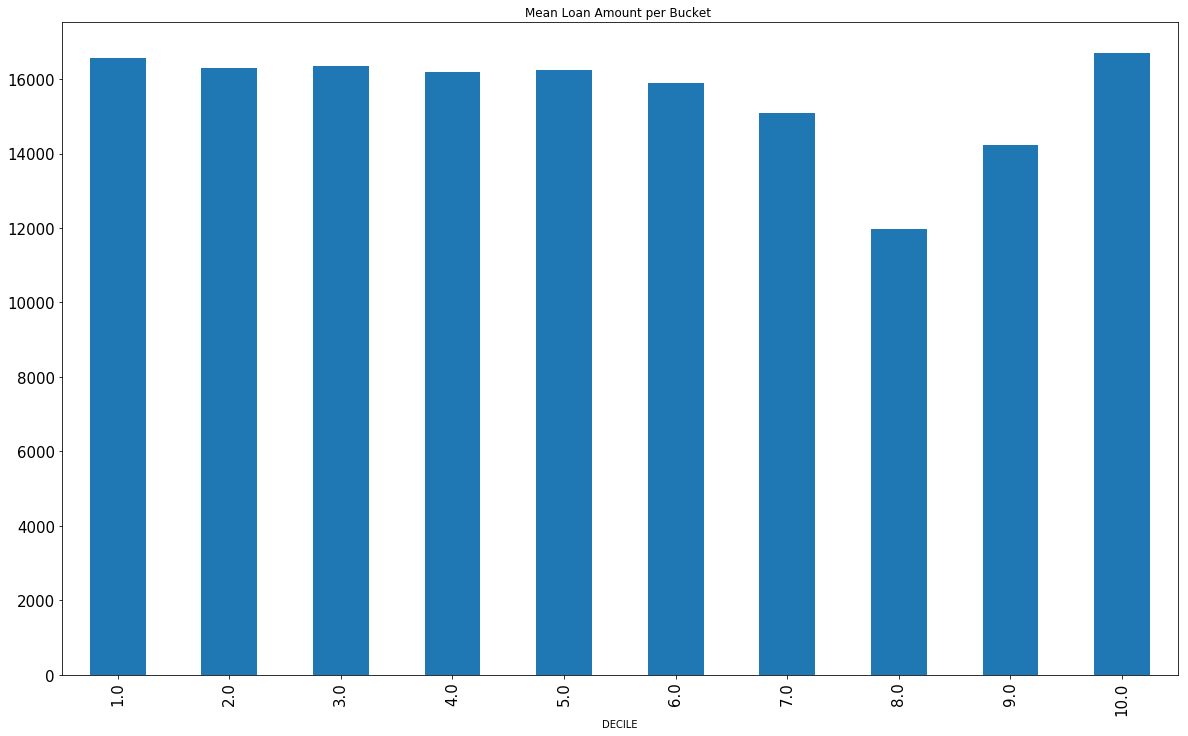

In [152]:
print(scored_data.groupby('DECILE')['loan_amnt'].mean())
scored_data.groupby('DECILE')['loan_amnt'].mean().plot(kind='bar',figsize = (20,12), title = 'Mean Loan Amount per Bucket ', fontsize= 15);


# Loan Payments Estimation

In [153]:
def calc_loan_pyts(r,PV,n):
    return r*PV/(1-(1+r)**-n)

In [154]:
scored_data['Payments'] = calc_loan_pyts(scored_data['Interest'], scored_data['loan_amnt'], scored_data['term_payments'])

In [155]:
scored_data.head(20)

,SCORE,DECILE,Y,Interest,loan_amnt,term_payments,Payments
0,0.036160,6.0,1.0,0.040631,5000.0,3,1803.901275
1,0.004502,7.0,1.0,0.019298,6000.0,3,2077.684792
2,0.004640,7.0,1.0,0.019298,5500.0,3,1904.544393
3,0.009057,7.0,1.0,0.019298,3500.0,3,1211.982795
4,0.016118,7.0,1.0,0.019298,16000.0,3,5540.492779
5,0.026145,6.0,1.0,0.040631,10000.0,3,3607.802549
6,0.019810,6.0,1.0,0.040631,9600.0,3,3463.490447
7,0.032918,6.0,1.0,0.040631,3500.0,3,1262.730892
8,0.008719,7.0,1.0,0.019298,10000.0,3,3462.807987
9,0.008472,7.0,1.0,0.019298,16000.0,3,5540.492779


# Bucket Net Present Value

In [156]:
def calculate_npv(x):
   rf_rate = 0.02
   disc_factor=(1-x["SCORE"])/(1+rf_rate)
   cashflows=[-x["loan_amnt"]]
   for i in range(1,int(x["term_payments"])+1):
       cashflows.append(x["Payments"]*(disc_factor**i))
       
   return np.sum(cashflows)

In [157]:
scored_data['NPV']=scored_data.apply(calculate_npv, axis=1)

In [158]:
scored_data.head(20)

,SCORE,DECILE,Y,Interest,loan_amnt,term_payments,Payments,NPV
0,0.036160,6.0,1.0,0.040631,5000.0,3,1803.901275,-162.643249
1,0.004502,7.0,1.0,0.019298,6000.0,3,2077.684792,-61.630224
2,0.004640,7.0,1.0,0.019298,5500.0,3,1904.544393,-57.994065
3,0.009057,7.0,1.0,0.019298,3500.0,3,1211.982795,-67.303600
4,0.016118,7.0,1.0,0.019298,16000.0,3,5540.492779,-528.097091
5,0.026145,6.0,1.0,0.040631,10000.0,3,3607.802549,-126.700752
6,0.019810,6.0,1.0,0.040631,9600.0,3,3463.490447,0.292591
7,0.032918,6.0,1.0,0.040631,3500.0,3,1262.730892,-91.454848
8,0.008719,7.0,1.0,0.019298,10000.0,3,3462.807987,-185.666777
9,0.008472,7.0,1.0,0.019298,16000.0,3,5540.492779,-289.312994


In [159]:
#Amother NPV calculator
def loan_NPV(r,proba_D,payments,loan_amnt, n): # A full mother function the calculate NPV, IRR and display pandas. All of that is done by passing the cashflows, period and rate of return(when needed)
    discount_factor = [] #The discounting factors will be stored in a list
    for h in range(0, n + 1): # loop to get discount factors and append to a list
        rate = (1 / ((1 + r) ** h))*((1-proba_D)**h)
        discount_factor.append(rate)
    npv_data = pd.DataFrame({'Cash_Flows': [i for i in range(0,n + 1)]}, index = [i for i in range(0, n + 1)]) #the iterations will take whatever cash flows assigned when my function is called in separate problems
    npv_data.index.name = 'Year' #The index is set to be named "Years'. The number of years is passed through function call
    npv_data.loc[0]['Cash_Flows'] = -loan_amnt #index zero in colmun with intial cost. The zero index was empty and reserved for the intial cost as stated
    npv_data.Cash_Flows.loc[[i for i in range(1, n + 1)]] = payments #tried several formats until this worked to change all cash flows through passing a list to the function and updating the iterable cash flow series. Note that range starts at 1 not 0 to keep 0 for intial cost reserved
    npv_data['Discounting factors'] = pd.Series(discount_factor) #panda columns are eventually series so I added a new series of the discounted cash flows through an outter function coded earlier
    npv_data['Discounted_Cash_Flows'] = npv_data.apply(np.prod, axis = 1) #apply method used to multiply cash flows column with discounting factors column to give new discounted cash flows column. Axis = 1 resembles columns and 0 for rows
#     npv = np.npv(r, npv_data.loc[:]['Cash_Flows']) #Pass cash flow column from dataframe. I could have summed up the discounted cash flows + intial cost, but kept a general frmat for calculation purposes
    npv= np.sum(npv_data.loc[:]['Discounted_Cash_Flows'])
    return npv # when calling the function I have to call all returned variables and fill all parameters. Some parameters are passed to allows the function to return a value without them yielding a significant implication on the functions calculations

In [160]:
loan_NPV(0.02,0.11086,1102.180548,2500,3)
# n=0
# for i in range(0,1000000):
#     scored_data['NPV'][i]= loan_NPV(0.02,scored_data['SCORE'][i], scored_data['Payments'][i], scored_data['loan_amnt'][i], scored_data['term_payments'][i])
#     n += 1
#     print("Loop number ", str(n))

28.359384836464983

In [162]:
#Save my final dataframe to file
scored_data.to_csv ('Desktop/Scored_Data.csv', index = None, header=True)

# Total Expected NPV per Bucket/Segment

In [163]:
Total_NPV = pd.DataFrame(scored_data.groupby('DECILE')['NPV'].sum())
Total_NPV

,NPV
DECILE,
1.0,-2.428214e+09
2.0,-2.387476e+09
3.0,-2.388778e+09
4.0,-2.336334e+09
5.0,2.068994e+09
6.0,-7.498175e+07
7.0,-4.266092e+07
8.0,-3.534465e+07
9.0,-4.130880e+07


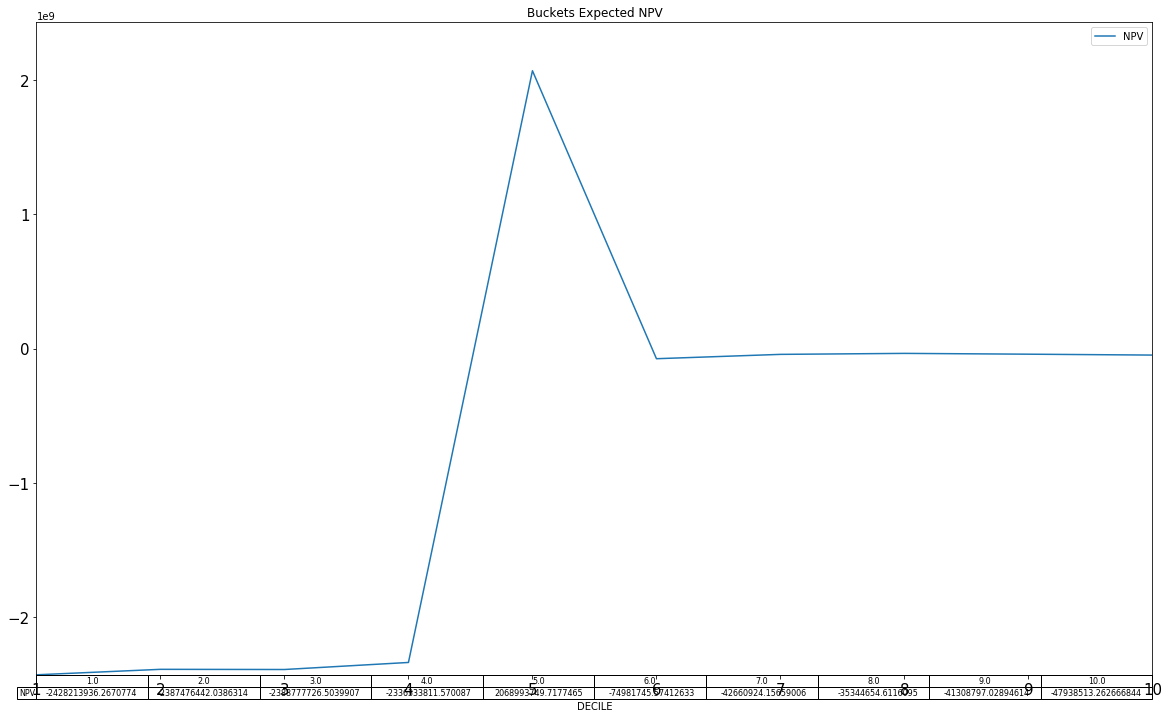

In [164]:
Total_NPV.plot(kind = 'line', ylim = (min(Total_NPV['NPV']),-min(Total_NPV['NPV'])), figsize = (20,12), title = 'Buckets Expected NPV', table = True, fontsize= 15);


# Second method : OneHotEncoder

All the encoding with the OneHotEncoder will turn our data into an array where it is hard to find the Y variable from the 
next generated array dataset. Though here is the code we might use instead of using 'pd.dummies'(which keeps our dataset into
                                                                                                dataframe pandas)

In [54]:
#ohe = OneHotEncoder(categorical_features=model_data['home_ownership'])
#ohe
ct = ColumnTransformer(transformers=[('home_ownership',OneHotEncoder(), [8,13])], remainder='passthrough')
model_data = ct.fit_transform(model_data)




/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [55]:
model_data

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 4.18820e+04,
        2.15000e+04, 3.46260e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.05911e+05,
        9.83000e+04, 8.96000e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.81850e+04,
        4.80000e+03, 1.56490e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 6.84450e+04,
        1.30000e+03, 5.71420e+04],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.29280e+04,
        1.14000e+04, 1.21250e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 6.52380e+04,
        2.20000e+04, 8.19750e+04]])

Encoder has converted 91 columns into 109 columns 

In [56]:
model_data[:].shape

(740359, 109)

In [57]:
# Now we are ready to run gradient boosting.
# Define Y and X
Y = model_data[:,13]
X = np.delete(model_data,[13],1)

In [58]:
X.shape

(740359, 108)

In [59]:
# # run a simple model
# params = {'n_estimators': 3,'max_leaf_nodes':6,'learning_rate': 0.1, 'random_state':1}
# model = ensemble.GradientBoostingClassifier(**params)
# model.fit(X, Y)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)


In [61]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
       

In [62]:
# Extract the small tree
tree_small = sel.estimator_[96]

In [63]:
tree_small

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1354754446, splitter='best')

In [64]:
# Get numerical feature importances
importances = tree_small.feature_importances_

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

#feature_importances 

In [65]:
importances

array([0.00000000e+00, 1.07945974e-04, 2.86930822e-03, 0.00000000e+00,
       1.25406274e-03, 2.79884364e-03, 7.86931495e-03, 1.33785610e-02,
       6.02675636e-02, 0.00000000e+00, 1.54782422e-02, 6.09091519e-03,
       3.19426841e-02, 7.58167564e-03, 2.65779135e-02, 4.68895411e-04,
       1.00740818e-02, 1.11465664e-02, 4.42176253e-04, 1.00239340e-02,
       8.39131955e-03, 1.53972103e-02, 2.66225015e-04, 1.74601254e-02,
       1.43728754e-02, 3.72549028e-03, 6.75780068e-03, 1.43955644e-02,
       4.49154280e-03, 2.81020706e-04, 0.00000000e+00, 1.45943456e-02,
       4.87422626e-03, 6.17562811e-03, 8.20195976e-03, 3.46850142e-03,
       1.88294851e-02, 1.59887734e-02, 1.26843259e-02, 7.47657304e-03,
       8.72381655e-03, 1.41053366e-02, 1.69385921e-02, 1.29834158e-02,
       1.94385748e-02, 2.45956198e-03, 3.23893968e-03, 4.57997173e-03,
       1.72605126e-02, 6.45299698e-04, 1.37250873e-02, 0.00000000e+00,
       4.10309435e-03, 6.34809971e-03, 1.16515309e-03, 5.66652234e-03,
      

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


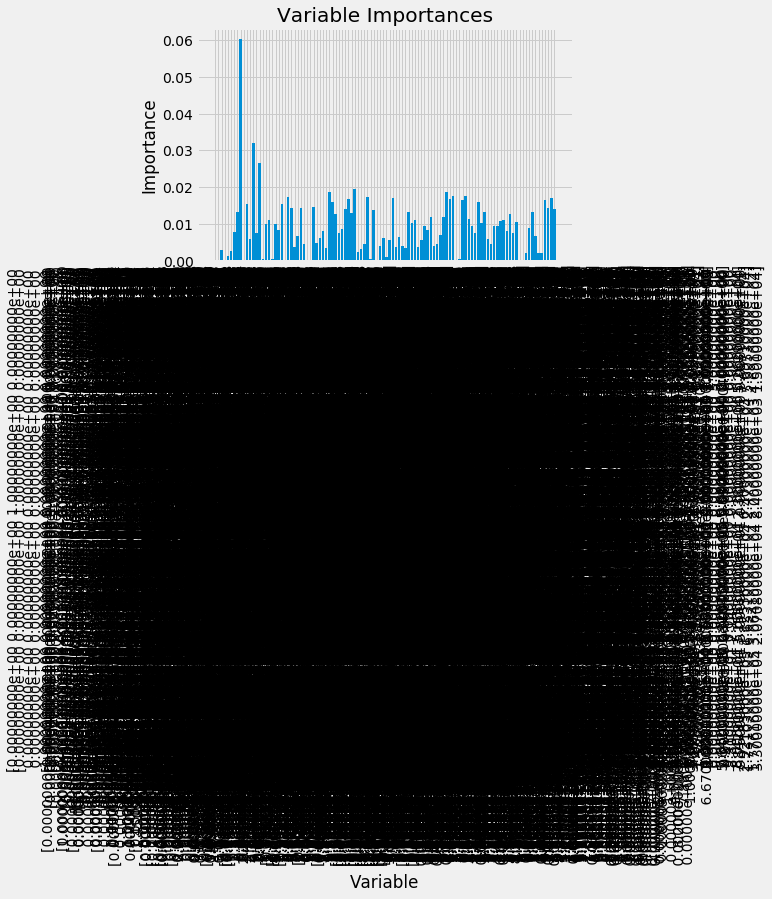

In [66]:
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = range(len(importances))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X_train, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [67]:
print(sel.get_support())


[False False False False False False  True  True  True False  True False
  True  True  True False  True  True False  True  True  True False  True
  True False False  True False False False  True False False  True False
  True  True  True False False  True  True  True  True False False False
  True False  True False False False False False  True False False False
 False  True  True  True False False  True  True  True False False False
 False  True  True  True False False  True  True  True  True False  True
  True  True False False False False  True  True False  True False  True
 False False False False  True False False False  True  True  True  True]


In [68]:
feature_importance = pd.DataFrame()
#feature_importance['Variable'] = ['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','grade','verification_status',
 #                                'purpose','out_prncp ']
feature_importance['Importance'] = importances

# feature_importance values in descending order
feature_importance.sort_values(by='Importance', ascending=False).head(24)

,Importance
8,0.060268
12,0.031943
14,0.026578
44,0.019439
36,0.018829
73,0.018789
75,0.017712
79,0.017571
23,0.017460
48,0.017261


In [69]:
#removing unnecessary features
Y = model_data[:,13]
X = np.delete(model_data,[0,11,13,9,7,13,26,27,28,29,34,35,41,44,45,46,47,49,51,52,53,57,
                         60,61,62,63,64,65,66,67,68,69,70,72,82,84,85,86,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109],1)

# X = np.delete(model_data,[0,1,2,3,4,5,6,7,8,11,13,15,16,18,19,20,21,22,23,24,25,28,29,31,32,34,35,36,37,40,41,42,45,47,48,49,51,52,53,54,55,56,57,
#                          59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,78,79,82,83,84,85,86,88,89,90,91,92,93,94,95,96,98,99,100,101,103,104,105,108,109],1)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  after removing the cwd from sys.path.


In [70]:
# Y = model_data[:,8]
# X = np.delete(model_data,[0,1,2,45,47,48,49,51,52,53,54,55,56,57,
#                          59,60,61,62,83,84,85,86,88,89,90,91,92],1)


In [71]:
X.shape

(740359, 52)

In [72]:
Y.shape

(740359,)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)



In [74]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=0, verbose=0,
       

In [75]:
print(sel.get_support())

[False False False False False False  True False False False False False
 False False False  True  True  True False  True  True False False  True
 False False  True  True  True  True  True  True False False False False
 False False  True False  True  True  True  True False False  True  True
  True False False False]


In [76]:
tree_small = sel.estimator_[27]

In [77]:
# Get numerical feature importances
importances = tree_small.feature_importances_

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# # Print out the feature and importances 
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

feature_importances 

[(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
         0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         8.00000e+03, 8.00000e+03, 8.00000e+03, 3.60000e+01, 1.09900e+01,
         2.61880e+02, 1.00000e+00, 0.00000e+00, 8.88000e+00, 0.00000e+00,
         0.00000e+00, 7.11300e+03, 5.08000e+01, 1.40000e+01, 1.52180e+03,
         7.85884e+03, 7.85884e+03, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
         4.00000e+00, 4.80900e+03, 6.91000e+02, 8.85000e+01, 0.00000e+00,
         0.00000e+00, 1.32000e+02, 2.00000e+02, 4.00000e+00, 0.00000e+00,
         3.00000e+00, 0.00000e+00]), 0.06),
 (array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         1.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
         0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
         0.000000e+00

In [78]:
feature_importance = pd.DataFrame()
#feature_importance['Variable'] = ['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','grade','verification_status',
 #                                'purpose','out_prncp ']
feature_importance['Importance'] = importances

# feature_importance values in descending order
feature_importance.sort_values(by='Importance', ascending=False).head(10)

# loan_amnt                           int64
# funded_amnt                         int64
# funded_amnt_inv                   float64
# term       
#int_rate                          float64
# grade                             float64
# verification_status                 int64
# purpose                            object
# out_prncp                         float64

,Importance
26,0.058117
43,0.049243
31,0.048577
41,0.046736
19,0.046678
46,0.046303
27,0.045386
23,0.044299
20,0.043477
30,0.043130


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


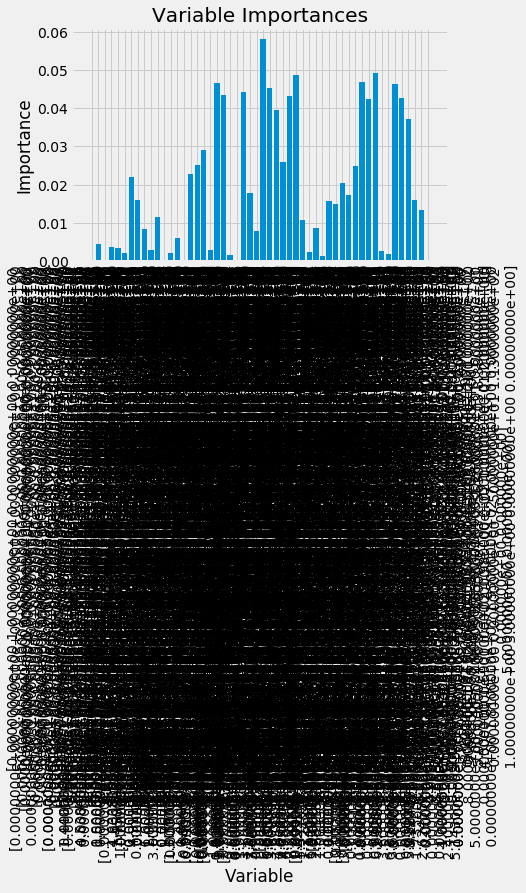

In [79]:
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = range(len(importances))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X_train, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');



In [80]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



Using TensorFlow backend.


In [81]:
# run a simple model




params = {'n_estimators': 27,'max_leaf_nodes':6,'learning_rate': 0.001, 'random_state':1, 'max_features': 21}
classifier = ensemble.GradientBoostingClassifier(**params)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.001, loss='deviance', max_depth=3,
                           max_features=21, max_leaf_nodes=6,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=27,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [84]:
params = {'n_estimators': 200,'max_leaf_nodes':20,'learning_rate': 0.5,'min_samples_split' : 0.2, 'random_state':1, 'max_features': 21}
classifier = ensemble.GradientBoostingClassifier(**params)
classifier.fit(X_test, y_test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features=21, max_leaf_nodes=20,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=0.2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [85]:
# Predict
Y_pred = classifier.predict(X_test)
Y_prob = classifier.predict_proba(X_test)

In [86]:
Y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [87]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[182482    112]
 [  2155    341]]


In [88]:
# Calculate AUC 
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, Y_pred))


0.5680026035237769


In [89]:
# now we run a grid search on GBM parameters
# save the results to choose the best parameters
import pandas as pd
from sklearn.metrics import roc_auc_score

results = pd.DataFrame(columns=["# Trees", "Max Features", "Learning Rate",
                                "Max Leaf Nodes", "Min Split","AUC_Test","AUC_Train", "Loss-Train",'Loss-Test'])
  

In [90]:
# X_grid = X
# Y_grid = Y
# X_train_grid,X_test_grid,y_train_grid,y_test_grid=train_test_split(X_grid,Y_grid,test_size=0.3,random_state= 0)

n = 0
for n_estimators in [250]:
        for max_features in ['auto']:
                for learning_rate in [0.5, 0.9, 1.2]:
                    for max_leaf_nodes in [4, 12,20]:
                            for min_samples_split in [0.0001, 0.1, 0.2]:
                                n += 1
                                print("Loop number ", str(n))
        
                                params = {'n_estimators': n_estimators,  
                                  'max_features':max_features,'max_leaf_nodes':max_leaf_nodes, 
                                  'learning_rate': learning_rate, 
                                  'min_samples_split': min_samples_split,
                                  'subsample':0.8, 'random_state':1}
                                model = ensemble.GradientBoostingClassifier(**params)
                                model.fit(X, Y)
                                results.loc[len(results)]=[n_estimators, max_features, learning_rate,
                                               max_leaf_nodes, min_samples_split,
                                               roc_auc_score(y_test, model.predict(X_test)),
                                               roc_auc_score(y_train, model.predict(X_train)),
                                               model.loss_(y_test,model.predict(X_test)),
                                               model.loss_(y_train,model.predict(X_train))]


Loop number  1
Loop number  2
Loop number  3
Loop number  4
Loop number  5
Loop number  6
Loop number  7
Loop number  8
Loop number  9
Loop number  10
Loop number  11
Loop number  12
Loop number  13
Loop number  14
Loop number  15
Loop number  16
Loop number  17
Loop number  18
Loop number  19
Loop number  20
Loop number  21
Loop number  22
Loop number  23
Loop number  24
Loop number  25
Loop number  26
Loop number  27


In [91]:
results

,# Trees,Max Features,Learning Rate,Max Leaf Nodes,Min Split,AUC_Test,AUC_Train,Loss-Train,Loss-Test
0,250,auto,0.5,4,0.0001,0.879557,0.881042,1.632372,1.635173
1,250,auto,0.5,4,0.1000,0.889977,0.888920,1.645275,1.648603
2,250,auto,0.5,4,0.2000,0.506648,0.507461,1.388497,1.388412
3,250,auto,0.5,12,0.0001,0.649633,0.649422,2.233401,2.235084
4,250,auto,0.5,12,0.1000,0.892403,0.891460,1.639338,1.642385
5,250,auto,0.5,12,0.2000,0.556615,0.557818,1.433925,1.434196
6,250,auto,0.5,20,0.0001,0.649633,0.649422,2.233401,2.235084
7,250,auto,0.5,20,0.1000,0.892403,0.891460,1.639338,1.642385
8,250,auto,0.5,20,0.2000,0.556615,0.557818,1.433925,1.434196
9,250,auto,0.9,4,0.0001,0.500000,0.500000,2.599553,2.600986


In [92]:
export_csv = results.to_csv ('Desktop/GBM.csv', index = None, header=True)

In [93]:
read_results = pd.read_csv('Desktop/GBM.csv')
read_results.tail() 

,# Trees,Max Features,Learning Rate,Max Leaf Nodes,Min Split,AUC_Test,AUC_Train,Loss-Train,Loss-Test
22,250,auto,1.2,12,0.1000,0.500000,0.500000,1.386294,1.386294
23,250,auto,1.2,12,0.2000,0.500000,0.500000,2.599553,2.600986
24,250,auto,1.2,20,0.0001,0.825933,0.825288,1.801991,1.804426
25,250,auto,1.2,20,0.1000,0.500000,0.500000,1.386294,1.386294
26,250,auto,1.2,20,0.2000,0.500000,0.500000,2.599553,2.600986


In [94]:
params = {'n_estimators': 200,'max_leaf_nodes':20,'learning_rate': 1.5,'min_samples_split' : 0.001, 'subsample':0.8, 'random_state':1,
          'max_features': 21}
classifier = ensemble.GradientBoostingClassifier(**params)
classifier.fit(X_test, y_test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=1.5, loss='deviance', max_depth=3,
                           max_features=21, max_leaf_nodes=20,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=0.001,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [108]:
proba_classes = pd.DataFrame()
proba_classes['Y']= y_test
proba_classes['Class:0'] = classifier.predict_proba(X_test)[:, 0]
proba_classes['Class:1'] = classifier.predict_proba(X_test)[:, 1]
proba_classes

,Y,Class:0,Class:1
0,0.0,1.000000,0.000000e+00
1,0.0,1.000000,0.000000e+00
2,0.0,1.000000,0.000000e+00
3,0.0,1.000000,4.974184e-97
4,0.0,0.999985,1.451026e-05
5,0.0,1.000000,0.000000e+00
6,0.0,1.000000,0.000000e+00
7,0.0,0.000000,1.000000e+00
8,0.0,1.000000,0.000000e+00
9,0.0,1.000000,0.000000e+00


# Histogram of Class Probabilities
If the model is very good, it should assign probabilities to the two different classes in a way it completely separates and distinguishes between the two classes. The "0" class would be visualized towards the left, and the 1 class would be visualized towrad the right.



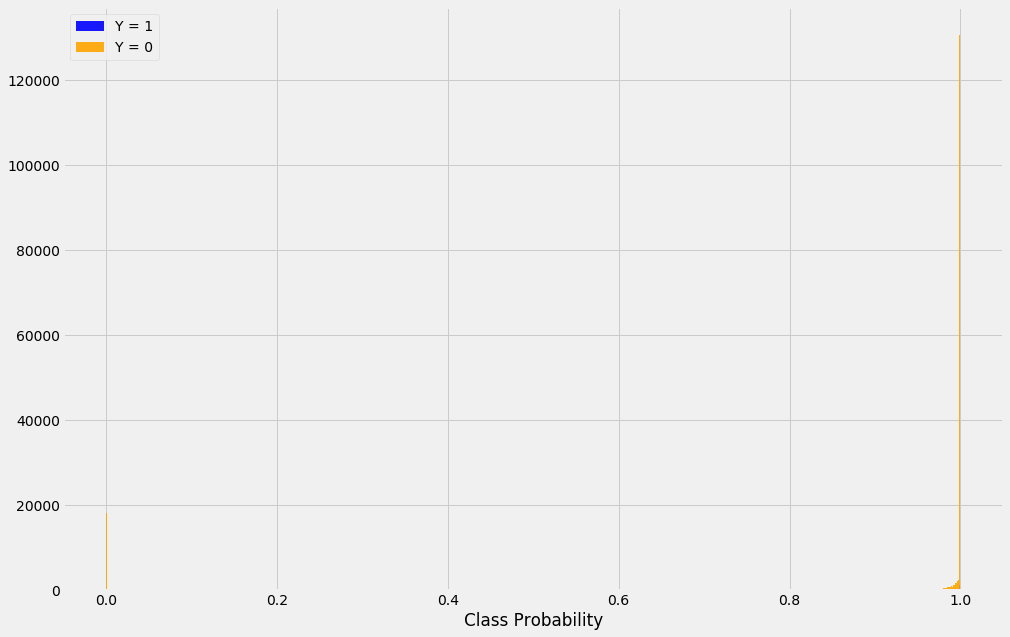

In [96]:
plt.figure(figsize=(15,10))
proba_classes[proba_classes.Y==1]['Class:1'].hist(alpha=0.9,color='blue',
                                              bins=1000,label='Y = 1')
proba_classes[proba_classes.Y==0]['Class:0'].hist(alpha=0.9,color='orange',
                                              bins=1000,label='Y = 0')
plt.legend()
plt.xlabel('Class Probability');

# Load Models for Deployment


1. GradientBoostingModel
2. Neural Network Model
3. Tuned Logestic Regression Model

In [628]:
GBM_model = joblib.load('Desktop/GBM.pkl')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DummyClassifier from version 0.21.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.21.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator GradientBoostingClassifier from version 0.21.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [629]:
GBM_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=20,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=0.0001,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# Another method for GBM model running 

In [630]:
# run a simple model
params = {'n_estimators': 20,'max_leaf_nodes':6,'learning_rate': 0.1, 'random_state':1, 'max_features': 21}
classifier = ensemble.GradientBoostingClassifier(**params)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=21, max_leaf_nodes=6,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [631]:
from keras.models import load_model

classifier_model = load_model('Desktop/Loan_default_classifier_model.h5')
classifier_model.summary()

Model: "sequential_183"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_547 (Dense)            (None, 5)                 420       
_________________________________________________________________
dense_548 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_549 (Dense)            (None, 1)                 6         
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________


In [632]:
logmodel_scaled = joblib.load('Desktop/LR_scaled.pkl')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [633]:
logmodel_scaled

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [634]:
scaler_model = joblib.load('Desktop/scaler.pkl')
scaler_model

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.21.2 when using version 0.21.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [635]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
logmodel_scaled.predict_proba(X_test)

ValueError: X has 39 features per sample; expecting 83

In [636]:
classifier_model.predict_proba(X_test)

ValueError: Error when checking input: expected sequential_183_input to have shape (83,) but got array with shape (39,)

Probability from GBM model

In [637]:
classifier.predict_proba(X_test)

array([[0.99791765, 0.00208235],
       [0.99779468, 0.00220532],
       [0.99791765, 0.00208235],
       ...,
       [0.93960911, 0.06039089],
       [0.99791765, 0.00208235],
       [0.99791765, 0.00208235]])

As GBM is the best from all the other methods we will go for the segmentation by GBM model

# Segmentation & Pricing for the credit loan data

1.Logistic 

2.Neural Network

3.Gradient Boosting 



Use each model to do segmentation; i.e. sort customers based on the probability of default estimated by each model, then classify them into 10 equal groups. Calculate bad rate for each group. Do your models Rank Order? Choose model with the best rank ordering for the next parts.

Assume risk free rate is 2%. Also assume that bad rate calculated in part 1, gives 1-year probability of default for each customer. Calculate the proper interest rate for each segment such that expected 1-year payoff for each segment equals 1-year risk-free pay off.

For the sake of simplicity assume that installments are paid annually; so for example a loan with 36 months term, will have 3 payments. Write a function that gets loan amount, number of payments, and interest rate as inputs, and calculates payments (look at this link for example: https://financeformulas.net/Loan_Payment_Formula.html). Use this function to calculate annual payment for each loan where interest rate comes from part 2. For the loan amount use "loan_amount" field and for the term use "term" field.

Write a function that gets loan amount, probability of default, loan term, loan installment, and discount rate as inputs, and calculates the expected NPV of loan. Use this function to calculate expected NPV for each loan. For Probability of Default, use outputs of your scoring model. For loan installment use results of part 3. For discount rate use risk free rate.

Hint: Note that cash flows are stochastic. For example if probability of default for a customer is 10%, with 10% probability he/she will default at the end of the first year, hence zero payoff. With 90% bank will collect the first year installment, and will continue to second year. In the second year, again with 10% probability customer will default, and with 90% no default. Therefore probability that bank collects second year installment is 0.9*0.9 = 0.81. Continue until loan maturity.

Calculate total expected NPV for each segment. Plot total Expected NPV versus Bad Rate. What is your expectation about the shape of the curve?

# Segmentation

In [98]:
GBM_model = pd.read_pickle("Desktop/GBM.pkl")
GBM_model = pd.DataFrame(GBM_model)

In [99]:
classifier.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [105]:
def credit_score_segmentwise(X,y_test,classifier, clas):
    score = pd.DataFrame(1-classifier.predict_proba(X)[:, clas], columns= ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10, labels = range(10,0,-1)).astype(float)
    score['Y']= Y
    new_score = score.groupby('DECILE')['Y'].apply(lambda y : len([elem for elem in y if elem == 0])/len(y))
                                                   
    #0 = default
    return(new_score, score)
                                    

In [106]:
GBM_scoring,_ = credit_score_segmentwise(X,y_test,classifier,1)
GBM_scoring

DECILE
1.0     0.985331
2.0     0.990248
3.0     0.986547
4.0     0.984697
5.0     0.991315
6.0     0.988289
7.0     0.986763
8.0     0.986709
9.0     0.983373
10.0    0.987249
Name: Y, dtype: float64

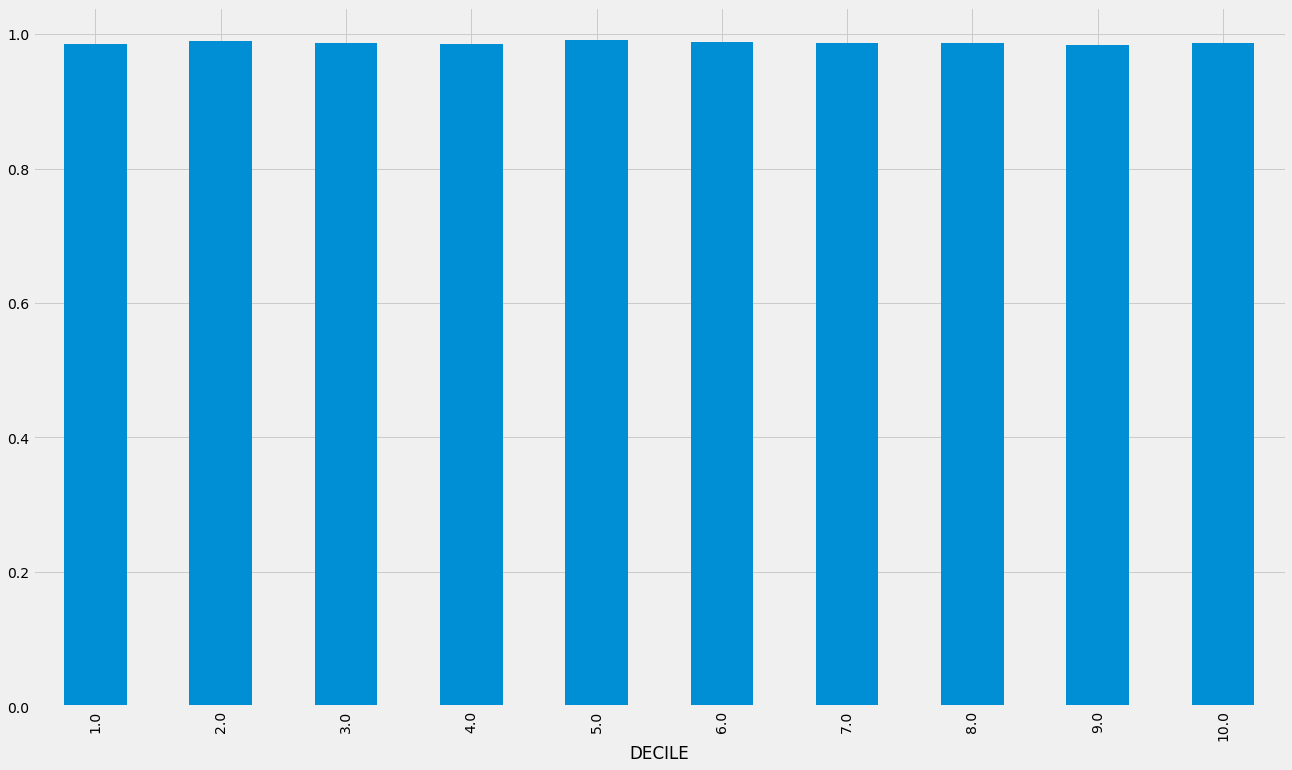

In [107]:
GBM_scoring.plot(kind='bar',figsize = (20,12));

# Example of Dropout on the Loan Dataset: Visible Layer

In [ ]:

from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



# dropout in the input layer with weight constraint

def create_model():
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(60,)))
	model.add(Dense(60, activation='relu', kernel_constraint=maxnorm(3)))
	model.add(Dense(30, activation='relu', kernel_constraint=maxnorm(3)))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(lr=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


def build_classifier():  
    classifier = Sequential()
    classifier.add(Dense(units=5, kernel_initializer='glorot_uniform', activation='relu'))
    classifier.add(Dense(units=5, kernel_initializer='glorot_uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier
  
classifier = KerasClassifier(build_fn=build_classifier, batch_size=10, nb_epoch=3)
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10, n_jobs=1)

print(accuracies.mean())
print(accuracies.std())



In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
def another_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units=6, kernel_initializer="glorot_uniform", activation="relu"))
    classifier.add(Dense(units=6, kernel_initializer="glorot_uniform", activation="relu"))
    classifier.add(Dense(units=1, kernel_initializer="glorot_uniform", activation="sigmoid"))
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn=build_classifier)
parameters = {
    'batch_size': [25,32], 
    'nb_epoch':[1,2], 
    'optimizer': ['adam', 'rmsprop']
  }
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=10)
grid_search = grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(best_parameters)
print(best_accuracy)

classify()

In [ ]:
# run a simple model

classifier = ensemble.GradientBoostingClassifier(**params)
classifier.fit(X_train, y_train)

# Predict
Y_pred = classifier.predict(X_test)
Y_prob = classifier.predict_proba(X_test)

# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
# print(cm)

# Calculate AUC 
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, Y_pred))


In [ ]:
# now we run a grid search on GBM parameters
# save the results to choose the best parameters
import pandas as pd
from sklearn.metrics import roc_auc_score
results = pd.DataFrame(columns=["# Trees", "Max Features", "Learning Rate",
                                "Max Leaf Nodes", "Min Split","AUC_Test","AUC_Train"])
    
for n_estimators in [1, 2]:
        for max_features in ['sqrt','auto']:
                for learning_rate in [0.001, 0.01, 0.1, 0.5]:
                    for max_leaf_nodes in [6, 8, 12, 16, 20]:
                            for min_samples_split in [0.00001, 0.1, 0.2, 0.3]:
        
                                params = {'n_estimators': n_estimators,  
                                  'max_features':max_features,'max_leaf_nodes':max_leaf_nodes, 
                                  'learning_rate': learning_rate, 
                                  'min_samples_split': min_samples_split,
                                  'subsample':0.8, 'random_state':1}
                                model = ensemble.GradientBoostingClassifier(**params)
                                model.fit(X, Y)
                                results.loc[len(results)]=[n_estimators, max_features, learning_rate,
                                               max_leaf_nodes, min_samples_split,
                                               roc_auc_score(Y_pred, model.predict(X_test)),
                                                          roc_auc_score(y_train, model.predict(X_train))]


In [ ]:
results#.sort_values(['AUC_Train', "AUC_Test"], ascending = False).head(10)

In [ ]:
from sklearn.metrics import roc_curve#results['AUC_Test']
fpr, tpr, thresholds = roc_curve(Y_pred, model.predict(X_test))

In [ ]:
#choosing best parameters from gridsearch
params = {'n_estimators': 2,'max_features':'auto','max_leaf_nodes':20,
          'learning_rate': 0.5,'min_samples_split': 0.3,'subsample':0.8, 'random_state':1}
best_model = ensemble.GradientBoostingClassifier(**params)
best_model.fit(X_train, y_train)

In [ ]:
feature_importance = pd.DataFrame()
#feature_importance['Variable'] = 
feature_importance['Importance'] = best_model.feature_importances_

# feature_importance values in descending order
feature_importance.sort_values(by='Importance', ascending=False).head(10)

In [ ]:
proba_classes = pd.DataFrame()
proba_classes['Y']= y_test
proba_classes['Class:0'] = best_model.predict_proba(X_test)[:, 0]
proba_classes['Class:1'] = best_model.predict_proba(X_test)[:, 1]
proba_classes.head()

In [ ]:
plt.figure(figsize=(10,6))
proba_classes[Y_prob <= 1]['Class:1'].hist(alpha=0.5,color='blue',
                                              bins=100,label='Y = 1')
proba_classes[Y_prob>=0]['Class:0'].hist(alpha=0.5,color='orange',
                                              bins=100,label='Y = 0')
plt.legend()
plt.xlabel('Class Probability');


In [ ]:
plt.plot(fpr, tpr)
plt.show()

In [ ]:
plt.plot(Y_prob)
plt.show()

In [ ]:
Y_pred

In [ ]:
feature_importance = pd.DataFrame()
feature_importance['Variable'] = X_train.columns
feature_importance['Importance'] = best_model.feature_importances_

# feature_importance values in descending order
feature_importance.sort_values(by='Importance', ascending=False).head(10)

In [ ]:
indx = range(len(Y_prob))
indx

In [ ]:
plt.plot(Y_prob)
plt.show()

In [ ]:
Y_prob

In [ ]:
Y_prob[5][1]